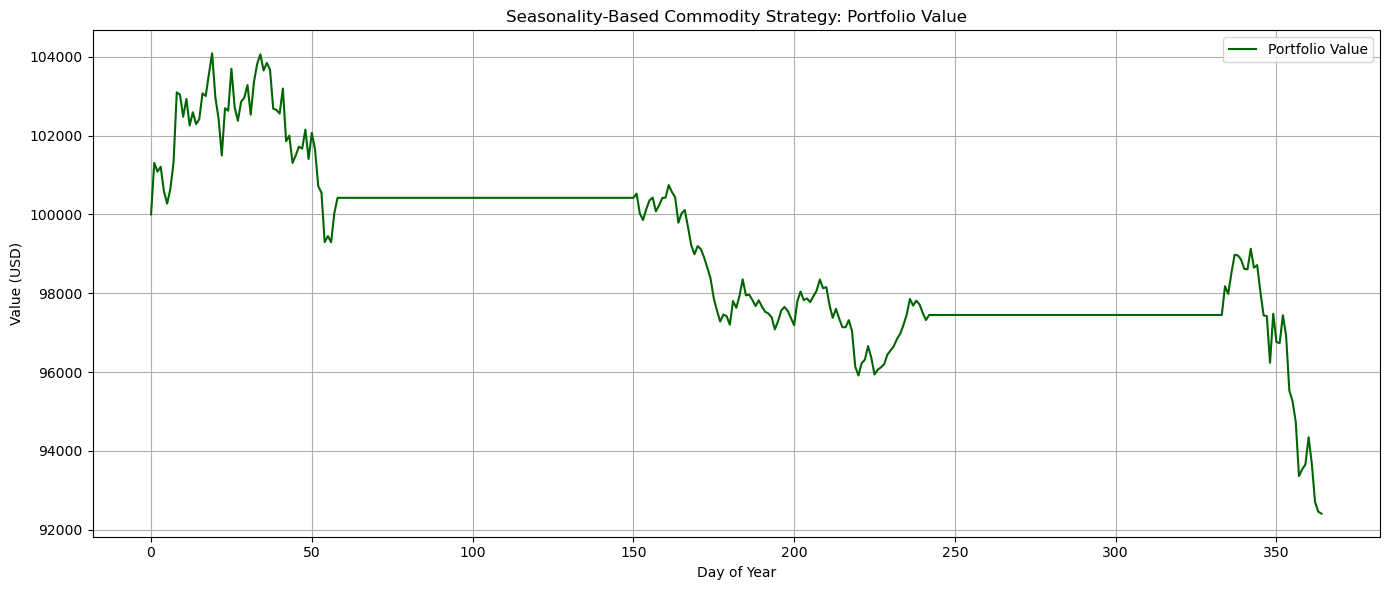

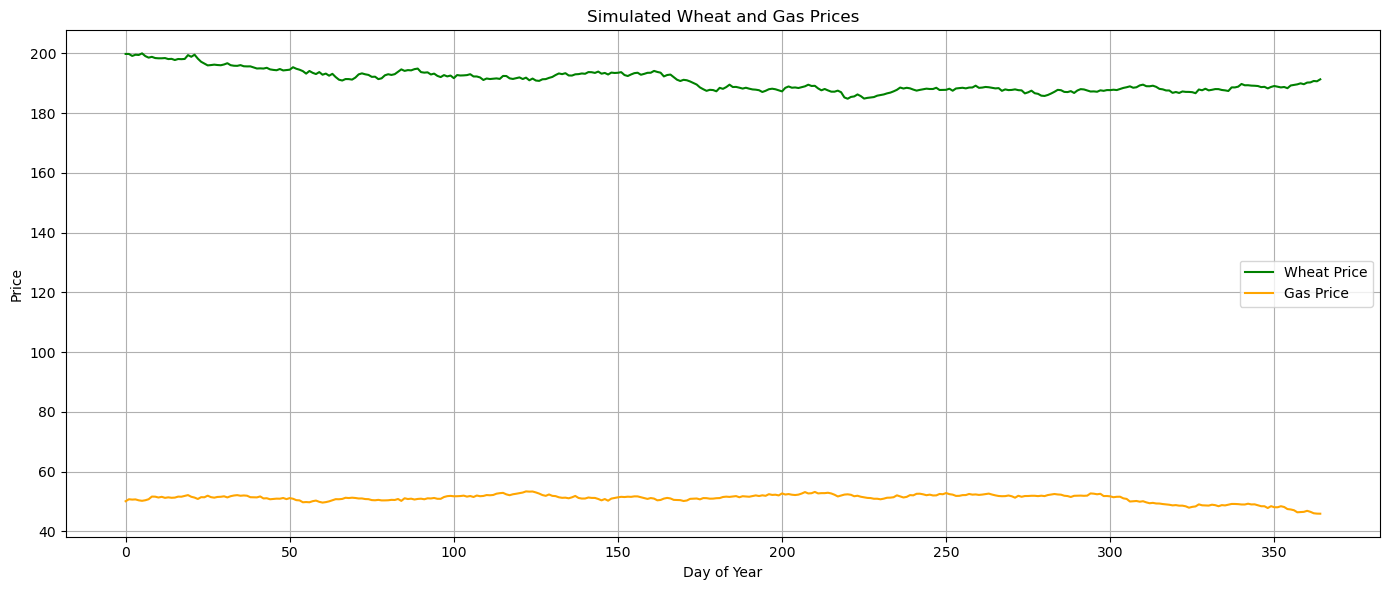

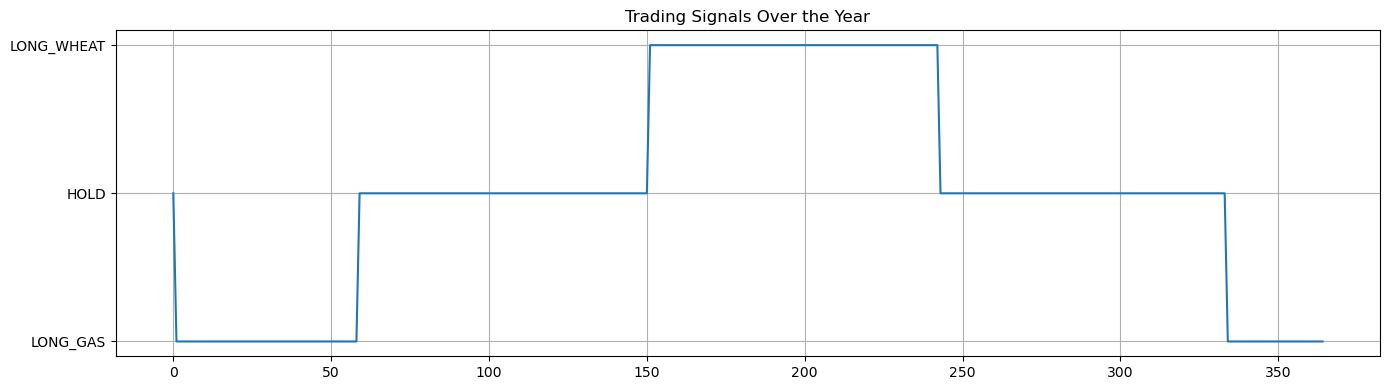

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate 365 days (1 year) of weather data with seasonality
np.random.seed(42)
days = 365
day_of_year = np.arange(1, days + 1)
temperature = 10 + 15 * np.sin(2 * np.pi * day_of_year / 365) + np.random.normal(0, 3, days)
rainfall = 5 + 3 * np.cos(2 * np.pi * day_of_year / 365) + np.random.exponential(scale=2, size=days)

# Simulate commodity prices with some randomness
wheat_price = 200 + np.cumsum(np.random.normal(0, 0.5, days))
gas_price = 50 + np.cumsum(np.random.normal(0, 0.3, days))

# Strategy: Use seasons to shift between wheat and gas
# - Winter (days 335–59): Long gas (heating demand)
# - Spring (days 60–151): Hold
# - Summer (days 152–243): Long wheat (drought risk)
# - Autumn (days 244–334): Hold

signals = []
returns = [0]  # First day has no return
capital = 100000
position = 'HOLD'
position_value = capital

for i in range(1, days):
    doy = day_of_year[i]
    
    if doy >= 335 or doy <= 59:
        position = 'LONG_GAS'
    elif 152 <= doy <= 243:
        position = 'LONG_WHEAT'
    else:
        position = 'HOLD'

    signals.append(position)

    # Compute daily return
    wheat_r = (wheat_price[i] - wheat_price[i-1]) / wheat_price[i-1]
    gas_r = (gas_price[i] - gas_price[i-1]) / gas_price[i-1]

    if position == 'LONG_WHEAT':
        daily_r = wheat_r
    elif position == 'LONG_GAS':
        daily_r = gas_r
    else:
        daily_r = 0

    position_value *= (1 + daily_r)
    returns.append(daily_r)

# Create DataFrame
data = pd.DataFrame({
    'Day': day_of_year,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'WheatPrice': wheat_price,
    'GasPrice': gas_price,
    'Signal': ['HOLD'] + signals,
    'DailyReturn': returns
})
data['CumulativeReturn'] = capital * (1 + data['DailyReturn']).cumprod()

# Plot cumulative return
plt.figure(figsize=(14, 6))
plt.plot(data['CumulativeReturn'], label='Portfolio Value', color='darkgreen')
plt.title('Seasonality-Based Commodity Strategy: Portfolio Value')
plt.xlabel('Day of Year')
plt.ylabel('Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot commodity prices
plt.figure(figsize=(14, 6))
plt.plot(data['WheatPrice'], label='Wheat Price', color='green')
plt.plot(data['GasPrice'], label='Gas Price', color='orange')
plt.title('Simulated Wheat and Gas Prices')
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot signal changes
plt.figure(figsize=(14, 4))
signal_numeric = data['Signal'].map({'HOLD': 0, 'LONG_WHEAT': 1, 'LONG_GAS': -1})
plt.plot(signal_numeric, label='Position Signal')
plt.title('Trading Signals Over the Year')
plt.yticks([-1, 0, 1], ['LONG_GAS', 'HOLD', 'LONG_WHEAT'])
plt.grid(True)
plt.tight_layout()
plt.show()